# 確率の基礎
## 確率とは
確率とは次の式で表される比である
```
期待するある事象の起こる場合の数 / 起こりうるすべての事象の場合の数
```
**標本空間**とは、**試行**の結果として生じる実現値の全体の集合である  
実現値は標本空間の1点であるから、**標本点**という  
**確率変数**とは、標本空間を数値化したもので、確率的に定まる変数である  
**確率分布**とは、確率変数の各々の値に対する確率のようすのことをいう

## 基本的用語の説明
### 離散確率変数
離散型変数はとびとびの値をとる変数のことで、隣り合う数字の間には値が存在しないものを指す

### 連続確率変数
連続型変数は、重さや温度などのように連続した値をとるものを指す

### 確率密度関数, 確率質量関数とパーセント点
- 離散確率変数の分布を表す関数を**確率質量関数**という  
    - ある範囲の確率は加算でもとめる
- 連続確率変数の分布を表す関数を**確率密度関数**という
    - ある範囲の確率は面積でもとめる
パーセント点Zαは、その点より上側の確率がαとなる点をいう

確率分布に基づくいくつかの計算は**SciPy**で行える

#### 離散確率分布
|SciPyでの表記  |確率分布名  |
|---|---|
|bernoulli  |Bernoulli distribution  |
|binom  |Binomial distribution  |
|poisson  |Poisson distribution  |

#### 連続確率分布
|SciPyでの表記  |確率分布名  |
|---|---|
|chi2  |Chi-squared(χ^2) distribution  |
|f  |F distribution  |
|norm  |Normal distribution  |
|t  |Student's t distribution  |
|uniform  |Uniform distribution  |

### 母集団と標本
母集団とは、調査対象となる集団全体のことを言う  
母集団の特性を表す値を母数という  


### 平均,分散,他の諸量
[確率変数の期待値](https://bellcurve.jp/statistics/course/6712.html)
[確率変数の分散](https://bellcurve.jp/statistics/course/6716.html)

## 正規分布
正規分布は、確率・統計学上最も有用な連続型の確率分布関数である

$$   
f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}}  \exp\left\{ - \frac{ (x-\mu)^2 }{ 2 \sigma^2} \right\}
$$

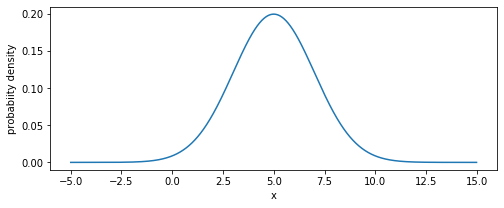

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

m = 5 # 平均値
std = 2 # 標準偏差
x = np.arange(-5, 15, 0.01)
y = norm.pdf(x, loc=m, scale=std)

fig = plt.subplots(figsize=(8,3))
plt.xlabel('x')
plt.ylabel('probabiity density')
plt.plot(x,y)

標準正規分布は、統計の検定などで使われるもので、正規分布に従うxを次のように変換する  
このとき、変換されたzは平均値0、分散1の正規分布である  

$$   
z = \frac{x - \mu}{\sigma} 〜 N(0,1)
$$

もとのxの区間が$[a,b]$であるとき、標準正規分布に変換されたzの区間は下のようになる

$$
[a,b] → [\frac{a - \mu}{\sigma}, \frac{b - \mu}{\sigma}]
$$

以下は、区間$[-1.65, 1.65]$の場合の確率を求めている

In [2]:
za = 1.65
zb = -1.65
pa = norm.cdf(za, loc=0, scale=1)
pb = norm.cdf(zb, loc=0, scale=1)
p = pa - pb
print('p=', p)

p= 0.9010570639327038


確率から区間を求める計算、検定は以下のようにおこなう

In [3]:
za, zb = norm.interval(alpha=0.95, loc=0, scale=1)
print('za=', za, 'zb=', zb)

za= -1.959963984540054 zb= 1.959963984540054


### 確率変数の生成

N = 100 mean = 2.081327 std = 3.401773e+00
N = 10000 mean = 2.031495 std = 2.991842e+00


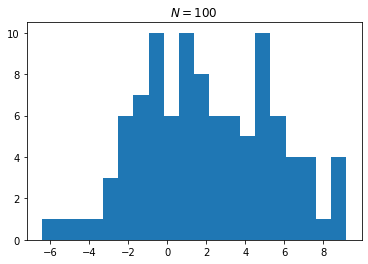

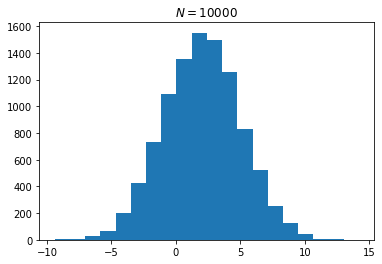

In [4]:
np.random.seed(123)

mean = 2.0
std = 3.0
for N in [100, 10000] :
    x = norm.rvs(loc=mean, scale=std, size=N)
    print('N = %d mean = %f std = %e' % (N, x.mean(), x.std(ddof=1)))
    plt.figure()
    plt.hist(x, bins=20)
    plt.title('$N = %i$' % (N))

### 中心極限定理
この定理は、母集団の確率分布がどのようなものであっても、nが十分大きければ、その標本平均は正規分布に従うとみなしてよいということである

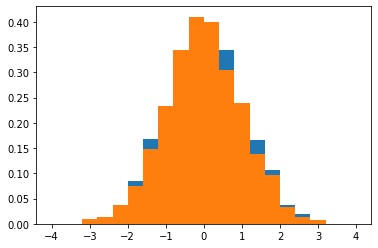

In [5]:
import scipy

N = 2000
y = np.zeros(N)
for n in [5, 5000] :
    for i in range(N) :
        x = scipy.stats.uniform.rvs(size=n)
        y[i] = (x.mean() - 1/2) / (np.sqrt(1/12) / np.sqrt(n))
    plt.hist(y, bins=20, range=(-4,4), density=True)

## ポアソン分布
ポアソン分布は、ある時間間隔tの中で平均$\lambda$回発生する確率事象がk回発生する確率を表現するのに用いられる  
kは自然数、eは自然定数の底である
$$
P(X=k) = \exp (-\lambda t) \frac{(\lambda t)^k}{k !}
$$
平均$\lambda$を変数としたときのP(X=k),(k=0,1,...,15)の場合は以下のようになる  
ただしt=1(単位時間)  
$\lambda$が大きくなるにつれて、分布がなだらかかつ右に移行している

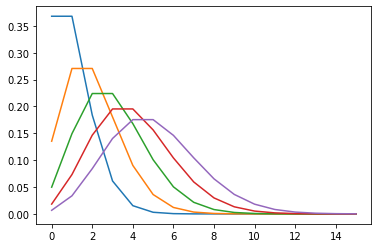

In [6]:
from scipy.stats import poisson

k = np.arange(0,16)
for lamb in range(1,6) :
    p = poisson.pmf(k, lamb)
    plt.plot(k, p, label='lamb='+str(lamb))

### ポアソン分布の例
1. ある都市の交通事故が1日平均2.4件で、件数がポアソン分布に従うと仮定したとき、1日の事故が2件以下となる確率

In [7]:
lamb = 2.4
psum = 0
for k in range(3) :
    p = poisson.pmf(k, mu=lamb)
    psum += p
print(psum)

0.5697087466575105


### ポアソン到着モデルのシミュレーション
待ち行列(ATM,スーパーなど)のシミュレーションの例  


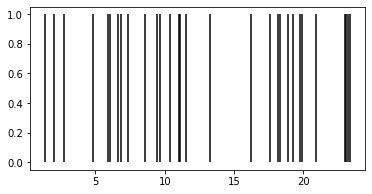

In [13]:
Num = 30 # 到着する客の人数
t_arrive = np.zeros(Num)
lamb = 1

sum = 0.0
for i in range(Num) :
    sum = sum - (1/lamb) * np.log(scipy.stats.uniform.rvs(size=1))
    t_arrive[i] = sum

fig, ax = plt.subplots(figsize=(6,3))
ax.vlines(t_arrive, ymin=0, ymax=1)

上の図の縦線は客が到着した時刻を表す

## 確率分布とパッケージ関数

scipy.statsを用いて確率分布関数の計算が容易にできる

### ベルヌーイ分布
ベルヌーイ分布は、ベルヌーイ試行の結果を0と1の2値で表した分布のこと
ベルヌーイ試行とは以下の3つの条件を満たす試行のこと
- 試行の結果は成功または失敗のいずれか
- 各試行は独立である
- 成功確率p,失敗確率(1-p)は試行を通じて一定である

パッケージ関数名 : scipy.stats.bernoulli

### 二項分布
パッケージ関数名 : scipy.stats.binom

### ポアソン分布
パッケージ関数名 : scipy.stats.poisson

### カイ二乗分布
パッケージ関数名 : scipy.stats.chi2

### 指数分布
パッケージ関数名 : scipy.stats.expon

### F分布
パッケージ関数名 : scipy.stats.f

### 正規分布
パッケージ関数名 : scipy.stats.norm

### t分布
パッケージ関数名 : scipy.stats.t

### 一様分布
パッケージ関数名 : scipy.stats.uniform